<a href="https://colab.research.google.com/github/RassimCHEBLI/RassimCHEBLI/blob/circleci-project-setup/tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('drive/My Drive/datascience_nlp')

In [4]:
ls

 allocine_squidgame.csv   house.csv                  tweets_visualisation.html
 comments_1.csv           KNN.xlsx                   winequality-white.csv
'data_corona (1).csv'    'KNN.xlsx - Feuil1.csv'
 data_corona.csv          tweets_politics_2022.csv


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data=pd.read_csv('allocine_squidgame.csv')

In [7]:
data

,Note,Description,Date,nombre_good,nombre_follow,key
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22\n\n\n10,Suivre son activité,0
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24\n\n\n12,Suivre son activité,1
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20\n\n\n21,Suivre son activité,2
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9\n\n\n10,Suivre son activité,3
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7\n\n\n\n9,Suivre son activité,4
...,...,...,...,...,...,...
336,"5,0",Vraiment une des meilleures séries que j'ai vu...,Publiée le 24 octobre 2021,0\n\n\n1,Suivre son activité,10
337,"4,5",Une série qui fait réfléchir.La série met en s...,Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,11
338,"4,0",très bonne série nous tiens en haleine du débu...,Publiée le 26 octobre 2021,0\n\n\n0,Suivre son activité,12
339,"3,5","Bonne série,je trouve que c'est une version so...",Publiée le 21 octobre 2021,0\n\n\n0,Suivre son activité,13


In [8]:
data.isna().sum()

Note             0
Description      0
Date             0
nombre_good      0
nombre_follow    0
key              0
dtype: int64

In [9]:
data.dtypes.value_counts()

object    5
int64     1
dtype: int64

In [10]:
data.shape

(341, 6)

In [11]:
data.head(10)

,Note,Description,Date,nombre_good,nombre_follow,key
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22\n\n\n10,Suivre son activité,0
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24\n\n\n12,Suivre son activité,1
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20\n\n\n21,Suivre son activité,2
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9\n\n\n10,Suivre son activité,3
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7\n\n\n\n9,Suivre son activité,4
5,"1,0",Encore un show fast-food à consommer par les a...,Publiée le 29 septembre 2021,34\n\n\n25,Suivre son activité,5
6,"5,0","Très très bonne série. Un mélange de thriller,...",Publiée le 18 septembre 2021,28\n\n\n29,Suivre son activité,6
7,"0,5","Considérant le degré d'horreur de Squid Game, ...",Publiée le 4 octobre 2021,22\n\n\n25,Suivre son activité,7
8,"1,5","Une série phénomène pathétique, rempli de mome...",Publiée le 3 octobre 2021,16\n\n\n10,Suivre son activité,8
9,"3,5",Plutôt bien réalisé et interprété mais bénéfic...,Publiée le 2 octobre 2021,4\n\n\n4,Suivre son activité,9


In [12]:
data['nombre_follow'].value_counts()

Suivre son activité    341
Name: nombre_follow, dtype: int64

Cleanning data


In [13]:
data.drop('nombre_follow', axis=1, inplace=True)#on Supprime la colone nombre follow
data.drop('key', axis=1, inplace=True)# On supprime la colone key

In [14]:
data

,Note,Description,Date,nombre_good
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22\n\n\n10
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24\n\n\n12
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20\n\n\n21
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9\n\n\n10
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7\n\n\n\n9
...,...,...,...,...
336,"5,0",Vraiment une des meilleures séries que j'ai vu...,Publiée le 24 octobre 2021,0\n\n\n1
337,"4,5",Une série qui fait réfléchir.La série met en s...,Publiée le 26 octobre 2021,0\n\n\n0
338,"4,0",très bonne série nous tiens en haleine du débu...,Publiée le 26 octobre 2021,0\n\n\n0
339,"3,5","Bonne série,je trouve que c'est une version so...",Publiée le 21 octobre 2021,0\n\n\n0


In [16]:
data['good'] = data.nombre_good.apply(lambda x: re.split("\s+", x)[0])# On rajoute la collonne good cette méthode régex nous permet de matcher tous sauf les espaces 
data['bad'] = data.nombre_good.apply(lambda x: re.split("\s+", x)[1])

data.drop('nombre_good', axis=1, inplace=True)# on supprime la colone nombre_good

In [17]:
data

,Note,Description,Date,good,bad
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22,10
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24,12
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20,21
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9,10
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7,9
...,...,...,...,...,...
336,"5,0",Vraiment une des meilleures séries que j'ai vu...,Publiée le 24 octobre 2021,0,1
337,"4,5",Une série qui fait réfléchir.La série met en s...,Publiée le 26 octobre 2021,0,0
338,"4,0",très bonne série nous tiens en haleine du débu...,Publiée le 26 octobre 2021,0,0
339,"3,5","Bonne série,je trouve que c'est une version so...",Publiée le 21 octobre 2021,0,0


In [18]:
data['Note'] = data['Note'].apply(lambda x: x.replace(',', '.'))
data['Note'] = data['Note'].astype(float)

In [19]:
!pip install dateparser

     |████████████████████████████████| 288 kB 3.2 MB/s 


In [20]:
import dateparser

In [21]:
data['Date'] = data['Date'].apply(lambda x: re.sub('Publiée le ', '', x))


In [22]:
data

,Note,Description,Date,good,bad
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2 octobre 2021,22,10
1,2.5,Encore une série très sur-côtée ! Tout est pré...,1 octobre 2021,24,12
2,4.5,Pas fan des séries coréennes en général. Je do...,22 septembre 2021,20,21
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",5 octobre 2021,9,10
4,4.0,"Visuellement recherché, très ludique, rythmé e...",25 septembre 2021,7,9
...,...,...,...,...,...
336,5.0,Vraiment une des meilleures séries que j'ai vu...,24 octobre 2021,0,1
337,4.5,Une série qui fait réfléchir.La série met en s...,26 octobre 2021,0,0
338,4.0,très bonne série nous tiens en haleine du débu...,26 octobre 2021,0,0
339,3.5,"Bonne série,je trouve que c'est une version so...",21 octobre 2021,0,0


In [23]:
data['Date'] = data.apply(lambda row: dateparser.parse(row['Date']), axis = 1)

In [24]:
data.head()

,Note,Description,Date,good,bad
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,22,10
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,24,12
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,20,21
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,9,10
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,7,9


TOKENISATION


In [25]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
data['description_clean'] = data['Description'].copy()# On Copie la colone Description
data['description_clean'] = data['description_clean'].map(lambda x : re.sub('[,\.!?()"]', '', x))#Remplacer les caracteres speciale par espace avec le regex
data['description_clean'] = data['description_clean'].map(lambda x : re.sub('\d', '', x)) #Remplacer les nombre entre 0 et 9  par espace avec le regex

In [27]:
data

,Note,Description,Date,good,bad,description_clean
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,22,10,On s'attendait à une fin plus élaborée clairem...
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,24,12,Encore une série très sur-côtée Tout est prév...
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,20,21,Pas fan des séries coréennes en général Je doi...
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,9,10,Disons le tout de suite je suis fan depuis an...
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,7,9,Visuellement recherché très ludique rythmé et ...
...,...,...,...,...,...,...
336,5.0,Vraiment une des meilleures séries que j'ai vu...,2021-10-24,0,1,Vraiment une des meilleures séries que j'ai vu...
337,4.5,Une série qui fait réfléchir.La série met en s...,2021-10-26,0,0,Une série qui fait réfléchirLa série met en sc...
338,4.0,très bonne série nous tiens en haleine du débu...,2021-10-26,0,0,très bonne série nous tiens en haleine du débu...
339,3.5,"Bonne série,je trouve que c'est une version so...",2021-10-21,0,0,Bonne sérieje trouve que c'est une version sof...


In [28]:
data['token'] = data.apply(lambda row : word_tokenize(str(row['description_clean'])), axis=1)

In [29]:
data

,Note,Description,Date,good,bad,description_clean,token
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,22,10,On s'attendait à une fin plus élaborée clairem...,"[On, s'attendait, à, une, fin, plus, élaborée,..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,24,12,Encore une série très sur-côtée Tout est prév...,"[Encore, une, série, très, sur-côtée, Tout, es..."
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,20,21,Pas fan des séries coréennes en général Je doi...,"[Pas, fan, des, séries, coréennes, en, général..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,9,10,Disons le tout de suite je suis fan depuis an...,"[Disons, le, tout, de, suite, je, suis, fan, d..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,7,9,Visuellement recherché très ludique rythmé et ...,"[Visuellement, recherché, très, ludique, rythm..."
...,...,...,...,...,...,...,...
336,5.0,Vraiment une des meilleures séries que j'ai vu...,2021-10-24,0,1,Vraiment une des meilleures séries que j'ai vu...,"[Vraiment, une, des, meilleures, séries, que, ..."
337,4.5,Une série qui fait réfléchir.La série met en s...,2021-10-26,0,0,Une série qui fait réfléchirLa série met en sc...,"[Une, série, qui, fait, réfléchirLa, série, me..."
338,4.0,très bonne série nous tiens en haleine du débu...,2021-10-26,0,0,très bonne série nous tiens en haleine du débu...,"[très, bonne, série, nous, tiens, en, haleine,..."
339,3.5,"Bonne série,je trouve que c'est une version so...",2021-10-21,0,0,Bonne sérieje trouve que c'est une version sof...,"[Bonne, sérieje, trouve, que, c'est, une, vers..."


In [30]:
french_stopwords = set(stopwords.words('french'))
french_stopwords

{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [31]:
data['token'] = data['token'].apply(lambda x : [word for word in x if word not in french_stopwords])

In [32]:
data.head()

,Note,Description,Date,good,bad,description_clean,token
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,22,10,On s'attendait à une fin plus élaborée clairem...,"[On, s'attendait, fin, plus, élaborée, clairem..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,24,12,Encore une série très sur-côtée Tout est prév...,"[Encore, série, très, sur-côtée, Tout, prévisi..."
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,20,21,Pas fan des séries coréennes en général Je doi...,"[Pas, fan, séries, coréennes, général, Je, doi..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,9,10,Disons le tout de suite je suis fan depuis an...,"[Disons, tout, suite, fan, depuis, ans, produc..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,7,9,Visuellement recherché très ludique rythmé et ...,"[Visuellement, recherché, très, ludique, rythm..."


CRÉATION DE LA COLLONNE SENTIMENTS

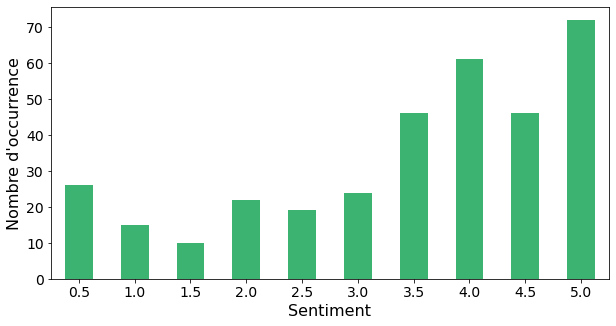

In [34]:
plt.figure(figsize=(10,5))
data['Note'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Nombre d\'occurrence', fontsize=16)
plt.show()

In [35]:
data["Sentiment"] = data['Note'].apply(lambda x: 0 if x<4 else 1)

STEMMING 

In [36]:
from nltk.stem import SnowballStemmer

In [37]:
stemmer = SnowballStemmer('french')
data['stemming'] = data.token.copy().apply(lambda x: [stemmer.stem(item) for item in x])

In [38]:
data.head()

,Note,Description,Date,good,bad,description_clean,token,Sentiment,stemming
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,22,10,On s'attendait à une fin plus élaborée clairem...,"[On, s'attendait, fin, plus, élaborée, clairem...",0,"[on, s'attend, fin, plus, élabor, clair, de, d..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,24,12,Encore une série très sur-côtée Tout est prév...,"[Encore, série, très, sur-côtée, Tout, prévisi...",0,"[encor, ser, tres, sur-côt, tout, prévisibl, p..."
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,20,21,Pas fan des séries coréennes en général Je doi...,"[Pas, fan, séries, coréennes, général, Je, doi...",1,"[pas, fan, ser, coréen, général, je, dois, avo..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,9,10,Disons le tout de suite je suis fan depuis an...,"[Disons, tout, suite, fan, depuis, ans, produc...",1,"[dison, tout, suit, fan, depuis, an, product, ..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,7,9,Visuellement recherché très ludique rythmé et ...,"[Visuellement, recherché, très, ludique, rythm...",1,"[visuel, recherch, tres, ludiqu, rythm, galer,..."


TRAIN/ TEST SPLIT

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(data['stemming'], data['Sentiment'], test_size=0.3, random_state=27)

In [59]:
y_train.shape

(238,)

In [60]:
y_train.value_counts()

1    124
0    114
Name: Sentiment, dtype: int64

In [61]:
y_test.value_counts()

1    55
0    48
Name: Sentiment, dtype: int64

In [62]:
x_train

90     [excellent, personnag, incroi, ains, jeux, sus...
143    [tres, inspir, battl, royal, donc, vrai, nouve...
80     [sort, prix, dang, version, encor, plus, proch...
145    [la, ser, a, fait, l'effet, d'un, bomb, réalit...
277              [plutôt, symp, j'ai, hât, voir, saison]
                             ...                        
312    [une, ser, fait, pass, temp, la, chut, plus, m...
31     [franch, tres, surpr, cet, ser, just, incroi, ...
328    [la, ser, regard, bien, univer, hung, gam, jeu...
184    [cet, ser, excellent, est-ce, chef, d'œuvr, ma...
19     [excellent, ser, plein, rebond, personnag, int...
Name: stemming, Length: 238, dtype: object

TF-IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf_vectorizer = TfidfVectorizer()

x_train_tfidf = tfidf_vectorizer.fit_transform([" ".join(words) for words in x_train])
labels_x_tfidf = tfidf_vectorizer.get_feature_names_out()

x_test_tfidf = tfidf_vectorizer.transform([" ".join(words) for words in x_test])

In [65]:
x_train_tfidf.shape

(238, 2961)

In [66]:
labels_x_tfidf.shape

(2961,)

In [67]:
data_tdidf_train = pd.DataFrame(data=x_train_tfidf.toarray(), columns=labels_x_tfidf)

In [55]:
data_tdidf_train.head()

,abandon,abattr,abim,abord,about,abri,abscon,absenc,absolu,absten,...,évident,évit,évolu,êre,êtr,être,île,œil,œuvr,œuvresc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
y_train

90     1
143    0
80     1
145    0
277    0
      ..
312    0
31     1
328    0
184    1
19     1
Name: Sentiment, Length: 238, dtype: int64

In [72]:
data_tdidf_train['sentiment'] = y_train

In [73]:
x_train_tfidf.shape

(238, 2961)

In [74]:
x_test_tfidf.shape

(103, 2961)

In [75]:
x_train_tfidf

<238x2961 sparse matrix of type '<class 'numpy.float64'>'
	with 12060 stored elements in Compressed Sparse Row format>

Modelisation

In [76]:
data_best_word = data_tdidf_train.groupby(['sentiment']).sum()
data_best_word 

,abandon,abattr,abim,abord,about,abri,abscon,absenc,absolu,absten,...,évident,évit,évolu,êre,êtr,être,île,œil,œuvr,œuvresc
sentiment,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.101425,0.000000,0.303216,0.036896,0.036896,0.039678,0.000000,0.302582,0.0,...,0.334311,0.370251,0.148209,0.0,0.914302,1.200748,0.147130,0.033391,0.275879,0.0
1.0,0.118241,0.000000,0.180492,0.250475,0.000000,0.000000,0.000000,0.167673,0.354560,0.0,...,0.210839,0.074653,0.078872,0.0,0.571319,0.664542,0.106653,0.170531,0.592472,0.0


In [78]:
#on fait la transosition de la matrice
data_best_word_transposed = data_best_word.T 

In [79]:
data_best_word_transposed.head()

sentiment,0.0,1.0
abandon,0.000000,0.118241
abattr,0.101425,0.000000
abim,0.000000,0.180492
abord,0.303216,0.250475
about,0.036896,0.000000


In [80]:
data_best_word_transposed.describe()

sentiment,0.0,1.0
count,2961.000000,2961.000000
mean,0.172145,0.184594
std,0.325319,0.374815
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.066609,0.084260
75%,0.210200,0.224360
max,5.266215,6.080413


In [81]:
word_neg = data_best_word_transposed.iloc[:,0].sort_values(ascending=False).head(150)

In [82]:
word_pos = data_best_word_transposed.iloc[:,1].sort_values(ascending=False).head(150)

In [83]:
word_tri = [word for word in word_neg.index if word not in word_pos.index]

In [84]:
x_test.head()

195    [pas, déplais, regard, d'énorm, ficel, scénari...
236    [j'ai, pass, bon, moment, dev, squid, gam, déc...
21     [décor, imag, sublim, melang, battl, royal, se...
325    [on, a, toujour, droit, sempiternel, pseudo-ex...
216    [malgr, l'engou, international, cet, ser, trou...
Name: stemming, dtype: object

In [85]:
y_test_predict = x_test.apply(lambda x: 0 if any(e in x for e in word_tri) else 1)

In [86]:
y_test_predict

195    0
236    0
21     0
325    0
216    1
      ..
29     0
260    0
252    0
208    0
226    1
Name: stemming, Length: 103, dtype: int64

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(y_test, y_test_predict)

array([[45,  3],
       [45, 10]])

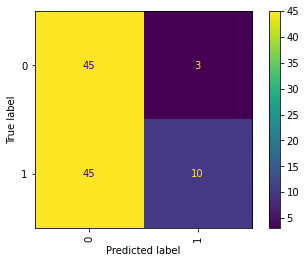

In [90]:
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(xticks_rotation='vertical')

plt.show()

MISE EN PLACE DU NAIVE BAYES 

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
#on fait appel a notre function
coun_vect = CountVectorizer() 
# Counter vectorize the Element N of Dataframe Event column
count_matrix = coun_vect.fit_transform([" ".join(words) for words in x_test]) 
# opn fait la conversion de la matrice rn tableau
count_array = count_matrix.toarray() 
data_count = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
data_count

,abdul,abois,abord,abordel,abordeun,absenc,absolu,absurd,accept,accroch,...,éven,éventuel,évident,évit,évolu,évoqu,êtr,être,îl,œuvr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [96]:
data['Sentiment']

0      0
1      0
2      1
3      1
4      1
      ..
336    1
337    1
338    1
339    0
340    1
Name: Sentiment, Length: 341, dtype: int64

In [104]:
x_train, x_test, y_train, y_test = train_test_split(data_count, data['Sentiment'][:103], test_size=0.33)

In [106]:
# on a le Model de Bernouilli
from sklearn.naive_bayes import BernoulliNB 
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [107]:
y_pred = bnb.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [108]:
(confusion_matrix(y_test, y_pred))

array([[ 2, 14],
       [ 0, 18]])

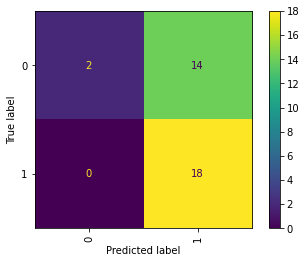

In [109]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(xticks_rotation='vertical')

plt.show()

In [111]:
# model multinomial 
from sklearn.naive_bayes import MultinomialNB 
mn = MultinomialNB()
mn.fit(x_train, y_train)


MultinomialNB()

In [112]:
y_pred = mnb.predict(x_test)

In [113]:
(confusion_matrix(y_test, y_pred))

array([[ 4, 12],
       [ 7, 11]])

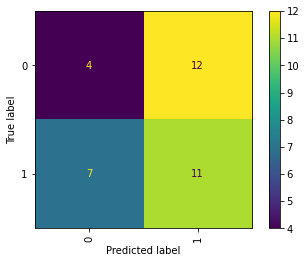

In [114]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(xticks_rotation='vertical')

plt.show()

In [115]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [116]:
y_pred = gnb.predict(x_test)

In [117]:
(confusion_matrix(y_test, y_pred))

array([[7, 9],
       [9, 9]])

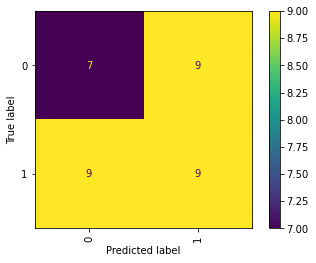

In [118]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(xticks_rotation='vertical')

plt.show()